In [1]:
import time
start_time=time.time()

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from astropy.coordinates import SkyCoord, EarthLocation
from astropy import units as u
from astropy.time import Time

In [4]:
rg="595"
reg='\\595b'

In [5]:
T=7450#K Table 5

https://iopscience.iop.org/article/10.1088/0004-637X/700/1/654

In [6]:
RA=23.390942#J2000
Dec=30.691559#J200

https://ned.ipac.caltech.edu/byname?objname=NGC%20595&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1

In [7]:
inputfile=dict()
inputfile[0]='Obs\ISIS.595.Blue.txt'

Arm Data

In [8]:
#Ha,[NII],[SII]

#LineN=['H$_{α}$ 6563','[NII]λ6548','[NII]λ6584','[SII]λ6717','[SII]λ6731']
#line=['Ha','Nb','Na','Sb','Sa']
#l=[6562.8,6548,6584,6717,6731]#AngstromsR
#SI=[18,12,12,15,15]#km/s
#XW=[1.00794,14.0067,14.0067,32.065,32.065]
#color=['green','red','red','purple','purple']

#Hb,[OIII]

LineN=['H$_{β}$ 4861','[OIII]λ4959','[OIII]λ5007']
LineM=['Hb4861','OIII4959','OIII5007']
LineD=['Hx','Ox','O']

line=['Hb','Ob','O4']
l=[4861.36,4958.9,5006.9]#AngstromsB
SI=[18,19,19]#km/s
XW=[1.00794,15.9994,15.9994]
color=['purple','blue','blue']

n=len(l)

In [9]:
Data=pd.read_table(inputfile[0])
Data=Data.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

In [10]:
Data

,Pos,X,Y,Slit,Archivo,Center.0,ErrC.0,Width.0,ErrW.0,Peak.0,...,ErrC.2,Width.2,ErrW.2,Peak.2,ErrP.2,Line.2,ErrL.2,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,1.0,214.5600,22.0,1.0,595a1_880-001004.xlsx,4853.837,0.185,0.644,0.374,10.260,...,50.299,176.260,76.337,-2.921,0.7299,-548.000,-348.100,NaN,NaN,NaN
1,2.0,213.1296,22.0,1.0,595a1_880-005008.xlsx,4855.518,0.298,0.287,0.873,-9.238,...,4.219,34.160,8.581,-2.898,0.7155,-105.400,-28.260,NaN,NaN,NaN
2,3.0,211.6992,22.0,1.0,595a1_880-009012.xlsx,4850.115,0.978,-1.573,1.036,3.090,...,1.416,7.574,2.570,-4.309,1.5730,-34.740,-12.440,NaN,NaN,NaN
3,4.0,210.2688,22.0,1.0,595a1_880-013016.xlsx,4514.190,5.551,-282.157,23.988,75.120,...,0.423,1.494,0.762,-5.956,3.1770,-9.471,-5.178,NaN,NaN,NaN
4,5.0,208.8384,22.0,1.0,595a1_880-017020.xlsx,4855.943,0.000,-0.242,0.121,-53.670,...,0.000,0.103,0.000,46700.000,0.0000,5126.000,4659.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
Data.columns

Index(['Pos', 'X', 'Y', 'Slit', 'Archivo', 'Center.0', 'ErrC.0', 'Width.0',
       'ErrW.0', 'Peak.0', 'ErrP.0', 'Line', 'ErrL', 'Center.1', 'ErrC.1',
       'Width.1', 'ErrW.1', 'Peak.1', 'ErrP.1', 'Line.1', 'ErrL.1', 'Center.2',
       'ErrC.2', 'Width.2', 'ErrW.2', 'Peak.2', 'ErrP.2', 'Line.2', 'ErrL.2',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31'],
      dtype='object')

In [12]:
sz=3
wd=Data.X.max()-Data.X.min()
hd=Data.Y.max()-Data.Y.min()
ar=wd/hd

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


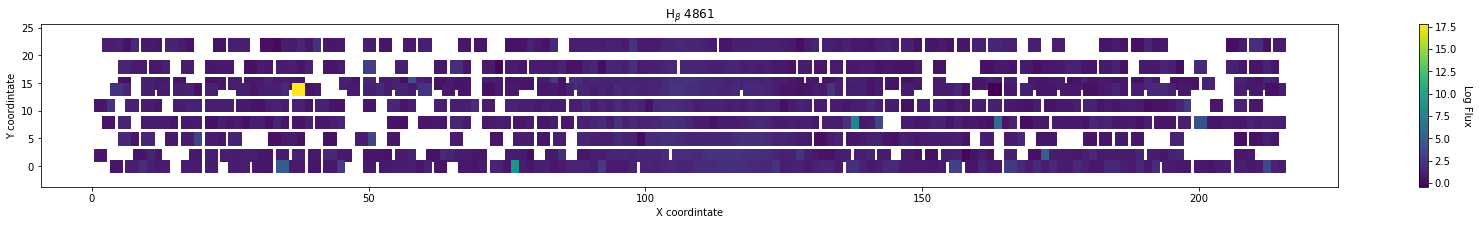

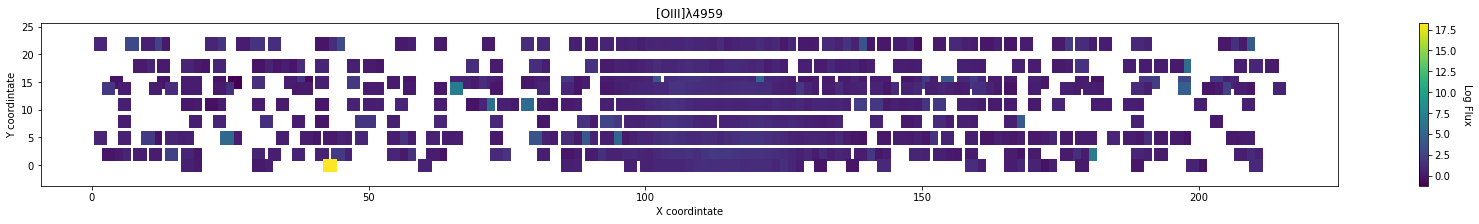

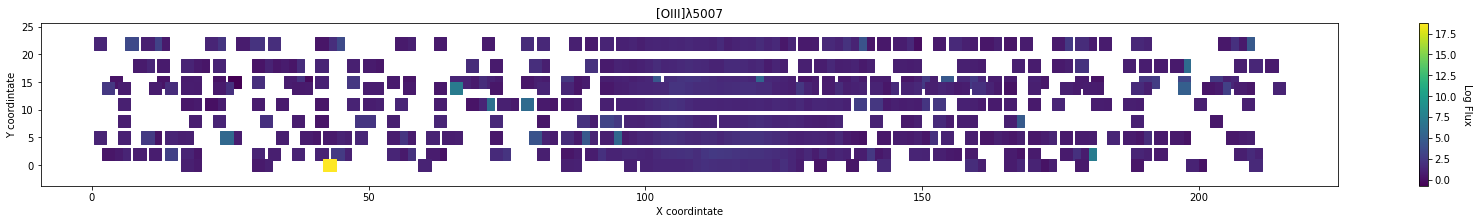

In [13]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    #fig, ax = plt.subplots(figsize=(15, 5))
    plt.scatter(Data.X,Data.Y,c=np.log10(Data['Peak.'+str(i)]), s=150,marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)  
    
    plt.savefig(rg+reg+'\Imgs\ISIS\ '+LineM[i]+'.png')

Sample A

In [14]:
m01=(Data.X>95)&(Data.X<125)
Data01=Data[m01]

sz=3
wd=Data01.X.max()-Data01.X.min()
hd=Data01.Y.max()-Data01.Y.min()
ar=wd/hd

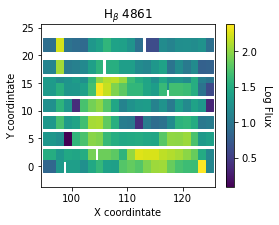

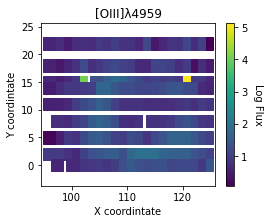

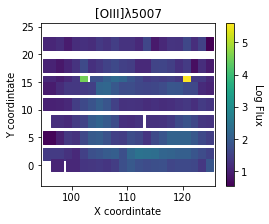

In [15]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(Data01.X,Data01.Y,c=np.log10(Data01['Peak.'+str(i)]), s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)


Tables individual lines

In [16]:
argo=dict()

for i in range(n):
    data=[Data01['X'],Data01['Y'],Data01['Center.'+str(i)],Data01['Peak.'+str(i)],Data01['Width.'+str(i)]]
    headers=["X","Y","Center","Peak","Width"]

    argo[i]=pd.concat(data,axis=1,keys=headers)
    

RadialVelocity

$$\dfrac{\lambda_{obs}-\lambda}{\lambda}*c + CorrHel $$

In [17]:
orm = EarthLocation.of_site('Roque de los Muchachos')
sc = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg)
heliocorr = sc.radial_velocity_correction('heliocentric', obstime=Time('1992-8-18'), location=orm) 
heliocorr.to(u.km/u.s)

<Quantity 25.90390484 km / s>

In [18]:
#Iraf
corrhelio=np.array(heliocorr.to(u.km/u.s))

#Constant
c=299792.459#km/s

for i in range(n):
    RVo=c*(argo[i].Center-l[i])/l[i]
    RV=RVo+corrhelio

    argo[i]=argo[i].assign(RV=RV.values)

Sigma Disp

$$\sigma_{disp}^{2}=\sigma_{obs}^{2}-\sigma_{therm}^{2}-\sigma_{inst}^{2}$$

$$ \sigma_{obs} = \frac{0.6006}{1.414}* \frac{Width}{\lambda}*c , \sigma_{therm}^{2} = \frac{166.3}{1.414} \frac{T_{e} \times 10^{-4}}{Xw}$$

In [19]:
#Atomic Weights
Hw=1.00794#
Nw=14.0067#
Sw=32.065#
Ow=15.9994#

#SigmaInst
SigmaInstH=18#km/s
SigmaInstN=12#km/s
SigmaInstS=15#km/s
SigmaInstO=19#km/s

#Constant
c=299792.459#km/s

In [20]:
SigmaObs=dict()

for i in range(n):
    #SigmaObs
    a=0.6006/1.414
    SigmaObs[i]=a*(argo[i].Width/l[i])*c
    
    #SigmaTerm
    b=166.6/1.414
    SigmaTerm=np.sqrt(b*(T/10000)/XW[i])

    SigmaDisp=np.sqrt(SigmaObs[i]**2-SigmaTerm**2-SI[i]**2)

    argo[i]=argo[i].assign(Sig=SigmaDisp.values)

    print(SigmaTerm)

9.331975500123068
2.342281466490701
2.342281466490701


C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
for i in range(n):
    print(argo[i].describe())    

                X           Y       Center          Peak       Width  \
count  189.000000  189.000000   189.000000    189.000000  189.000000   
mean   110.140800   10.555556  4751.559799   -580.653831   -1.744063   
std      8.684507    7.012400   701.378251   7131.634604   76.895455   
min     95.836800    0.000000     0.000000 -96890.000000 -868.597000   
25%    102.988800    5.000000  4857.423000     15.670000    0.831000   
50%    110.140800   11.000000  4857.649000     25.740000    0.988000   
75%    117.292800   15.000000  4857.766000     49.710000    1.198000   
max    124.444800   22.000000  4876.841000    246.700000  554.618000   

                  RV           Sig  
count     189.000000    160.000000  
mean    -6745.302563    319.435460  
std     43252.898480   2167.079745  
min   -299766.555095      2.913891  
25%      -216.884720     13.773037  
50%      -202.947654     18.193793  
75%      -195.732447     27.405259  
max       980.592934  22751.864477  
                X 

Sample A

In [22]:
 m0=(argo[1].Peak<1000)&(argo[0].RV>-300)&(argo[0].RV<-150)&(argo[1].RV>-300)&(argo[1].RV<-210)  

In [23]:
sz=3
wd=argo[0].X.max()-argo[0].X.min()
hd=argo[0].Y.max()-argo[0].Y.min()
ar=wd/hd

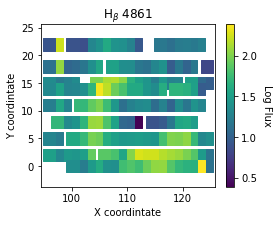

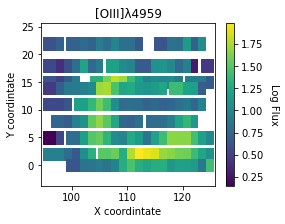

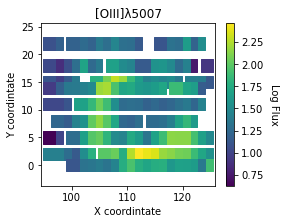

In [24]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m0].X,argo[i][m0].Y,c=np.log10(argo[i][m0].Peak), s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\A\F'+LineM[i]+'.png')

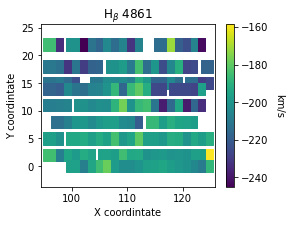

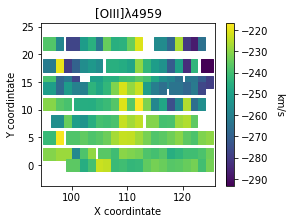

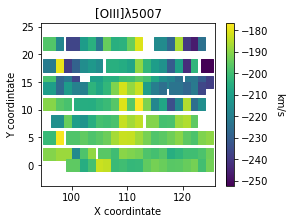

In [25]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m0].X,argo[i][m0].Y,c=argo[i][m0].RV, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('km/s', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\A\RV'+LineM[i]+'.png')

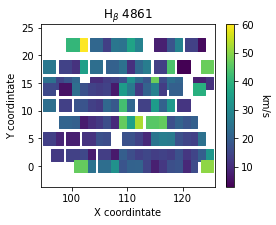

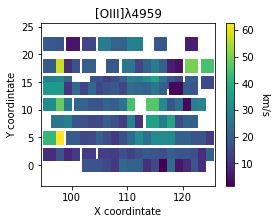

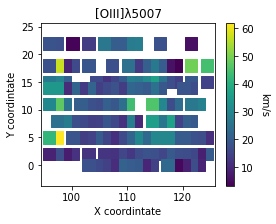

In [26]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m0].X,argo[i][m0].Y,c=argo[i][m0].Sig, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('km/s', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\A\S'+LineM[i]+'.png')

In [27]:
for i in range(n):
    print(argo[i][m0].describe())   

                X           Y       Center        Peak       Width  \
count  167.000000  167.000000   167.000000  167.000000  167.000000   
mean   110.149365   10.401198  4857.631874   46.858479    0.979623   
std      8.359041    6.967273     0.232060   45.241480    0.503851   
min     95.836800    0.000000  4856.966000    2.461000   -1.028000   
25%    102.988800    5.000000  4857.488000   18.415000    0.838000   
50%    110.140800   11.000000  4857.676000   28.720000    0.964000   
75%    117.292800   15.000000  4857.773500   56.300000    1.174500   
max    124.444800   22.000000  4858.373000  246.700000    2.422000   

               RV         Sig  
count  167.000000  139.000000  
mean  -204.003772   20.494166  
std     14.310747   11.016662  
min   -245.067195    2.913891  
25%   -212.876272   13.455878  
50%   -201.282607   17.197916  
75%   -195.269934   23.984893  
max   -158.299708   60.114304  
                X           Y       Center        Peak       Width  \
count  167.

Statistical Filter

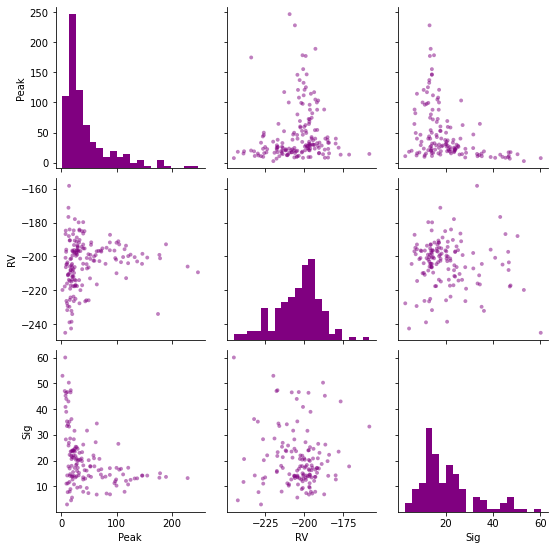

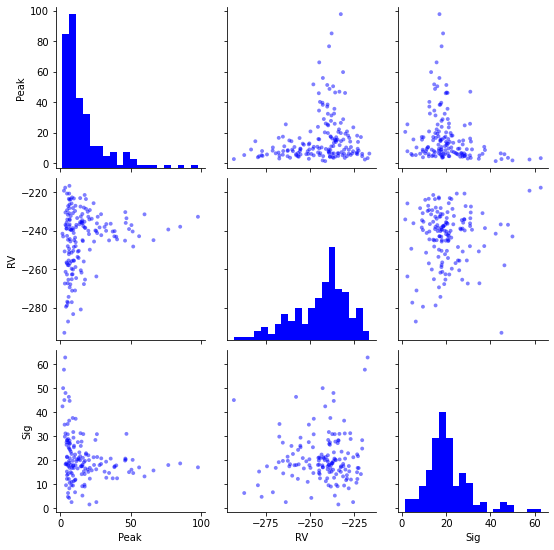

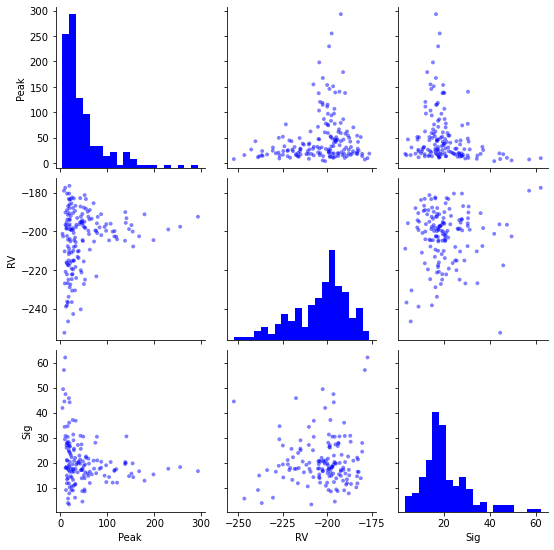

In [28]:
for i in range(n):

    sns.pairplot(argo[i][m0],
                 vars=["Peak", "RV", "Sig"],
                 diag_kind='hist',
                 plot_kws=dict(alpha=0.5, s=15, edgecolor='none',color=color[i]),
                 diag_kws=dict(bins=20,color=color[i]),
                )



Sample B

In [29]:
m=(argo[0].RV>-300)&(argo[0].RV<-175)&(argo[1].RV>-300)&(argo[1].RV<-200)&(argo[0].Peak>15)

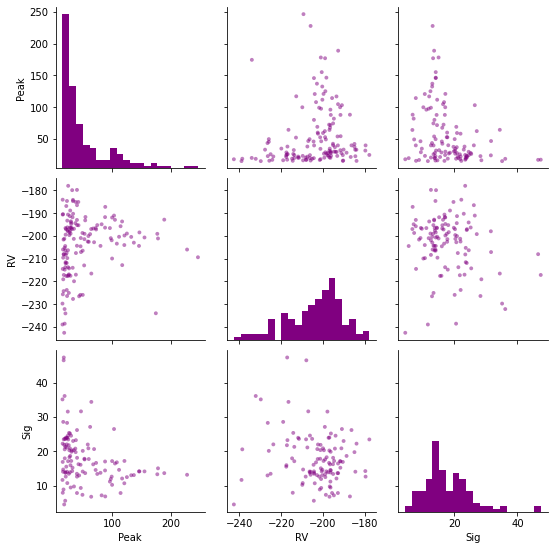

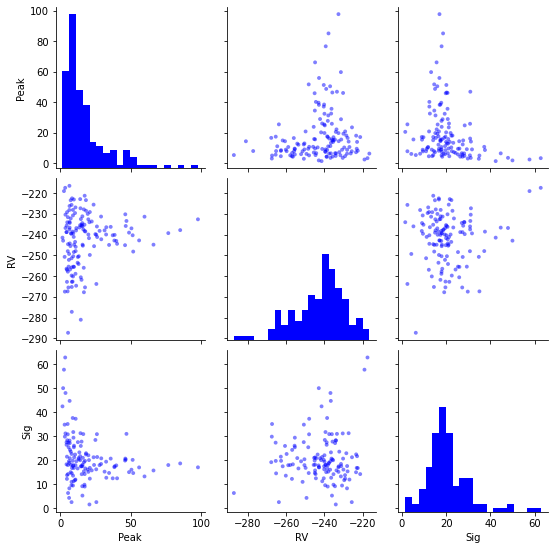

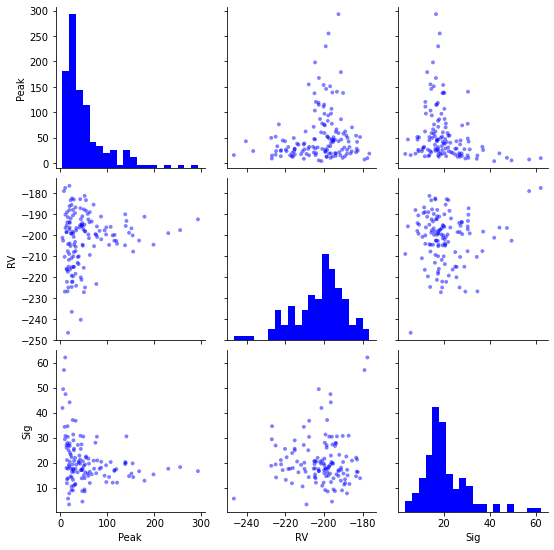

In [30]:
for i in range(n):

    sns.pairplot(argo[i][m],
                 vars=["Peak", "RV", "Sig"],
                 diag_kind='hist',
                 plot_kws=dict(alpha=0.5, s=15, edgecolor='none',color=color[i]),
                 diag_kws=dict(bins=20, color=color[i]),
                )
    
    plt.savefig(rg+reg+'\Imgs\Corrl\ '+LineM[i]+'.png')


In [31]:
sz=3
wd=argo[0][m].X.max()-argo[0][m].X.min()
hd=argo[0][m].Y.max()-argo[0][m].Y.min()
ar=wd/hd

<ipython-input-32-044d1aac332c>:3: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(argo[i][m].X,argo[i][m].Y,c=np.log10(argo[i][m]).Peak, s=150, marker='s')
<ipython-input-32-044d1aac332c>:3: RuntimeWarning: invalid value encountered in log10
  plt.scatter(argo[i][m].X,argo[i][m].Y,c=np.log10(argo[i][m]).Peak, s=150, marker='s')


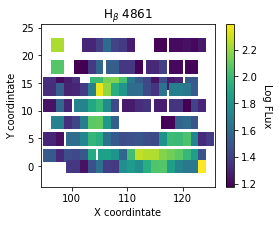

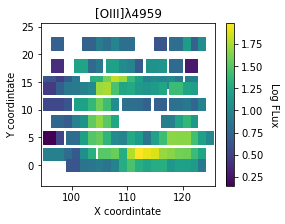

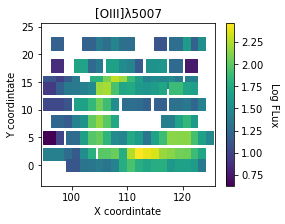

In [32]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m].X,argo[i][m].Y,c=np.log10(argo[i][m]).Peak, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log FLux', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\B\F'+LineM[i]+'.png')

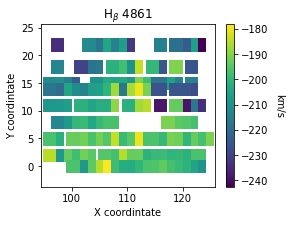

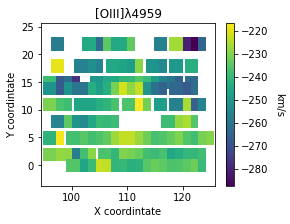

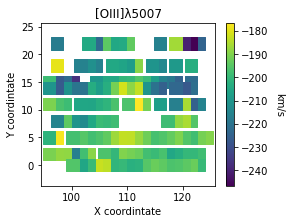

In [33]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m].X,argo[i][m].Y,c=argo[i][m].RV, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('km/s', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\B\RV'+LineM[i]+'.png')

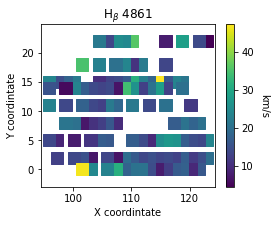

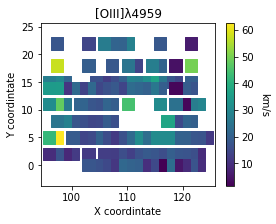

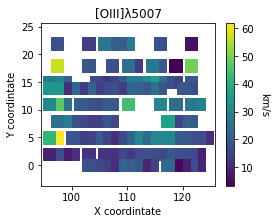

In [34]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m].X,argo[i][m].Y,c=argo[i][m].Sig, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    #cbar.ax.set_yticklabels(['0','1','2','>3'])
    cbar.set_label('km/s', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\B\S'+LineM[i]+'.png')

In [35]:
for i in range(n):
    print(argo[i][m].describe())  

                X           Y       Center        Peak       Width  \
count  142.000000  142.000000   142.000000  142.000000  142.000000   
mean   109.707651    9.732394  4857.636254   53.279085    0.903507   
std      8.107669    6.869519     0.211846   46.163179    0.419739   
min     95.836800    0.000000  4857.007000   15.040000   -0.933000   
25%    102.988800    2.750000  4857.505500   22.447500    0.830000   
50%    109.425600   11.000000  4857.681500   33.045000    0.945000   
75%    116.935200   15.000000  4857.773750   66.772500    1.104500   
max    124.444800   22.000000  4858.054000  246.700000    1.967000   

               RV         Sig  
count  142.000000  115.000000  
mean  -203.733710   17.838842  
std     13.064224    7.479553  
min   -242.538789    4.514169  
25%   -211.797075   13.360846  
50%   -200.943430   16.625383  
75%   -195.254517   21.833070  
max   -177.971938   47.366221  
                X           Y       Center        Peak       Width  \
count  142.

 $\sigma_{disp}$ vs I (a.k.a. Peak)

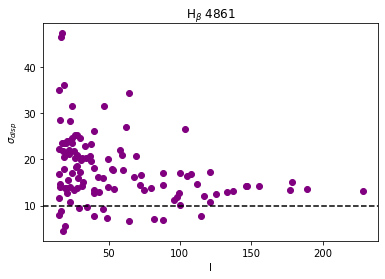

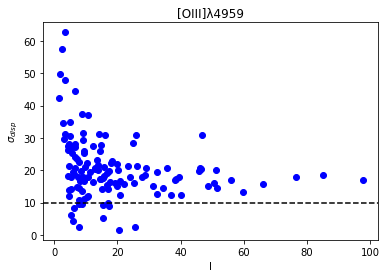

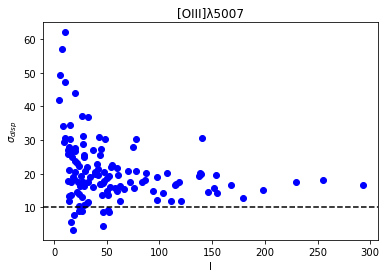

In [36]:
for i in range(n):
    fig, ax = plt.subplots()
    plt.scatter(argo[i][m].Peak,argo[i][m].Sig,color=color[i])
    plt.title(LineN[i])
    plt.axhline(y=10, color='k', linestyle='--')
    ax.set_xlabel('I')
    ax.set_ylabel('$σ_{disp}$')
  
    
    plt.savefig(rg+reg+'\Imgs\SvsI\SI'+LineM[i]+'.png')

Ratios

In [37]:

sz=3
wd=argo[0].X.max()-argo[0].X.min()
hd=argo[0].Y.max()-argo[0].Y.min()
ar=wd/hd

[OIII]/Hb Ratio

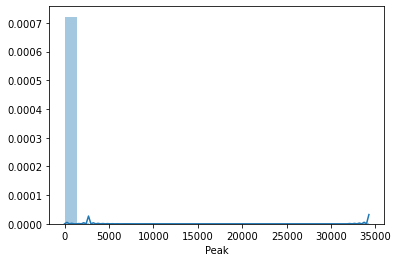

In [38]:
OHRatio=(argo[1].Peak+argo[2].Peak)/argo[0].Peak
sns.distplot(OHRatio,bins=25)

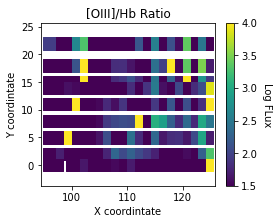

In [39]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
#plt.scatter(argo[0][m04].X,argo[0][m04].Y,c=SHRatio[m04], s=150, marker='s')
plt.scatter(argo[0].X,argo[0].Y,c=OHRatio, s=150, marker='s')
#plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
plt.axis('equal')
plt.title('[OIII]/Hb Ratio')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
    
cbar = plt.colorbar()
cbar.set_label('Log FLux', rotation=270, labelpad=15)
plt.clim(1.5,4)

plt.savefig(rg+reg+'\Imgs\RD\OR'+LineM[i]+'.png')

Export Samples for statistical analysis

In [40]:
#for i in range(n):
#    argo[i][m0].to_csv(rg+reg+'\Data\ISIS\A\ '+LineM[i]+'.csv')

In [41]:
for i in range(n):
    argo[i][m0].to_csv('Res\ 595I'+LineD[i]+'B.csv')

In [42]:
#for i in range(n):
#    argo[i][m].to_csv(rg+reg+'\Data\ISIS\B\ '+LineM[i]+'.csv')

In [43]:
for i in range(n):
    argo[i][m].to_csv('Res\ 595I'+LineD[i]+'C.csv')

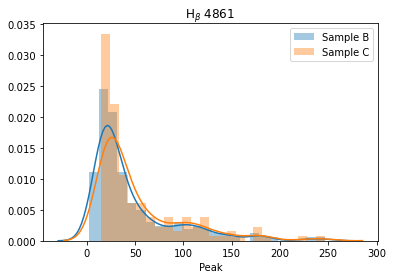

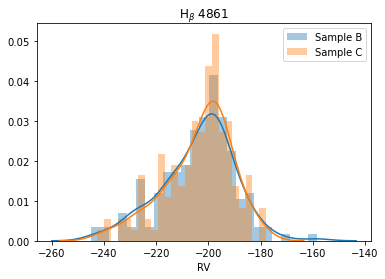

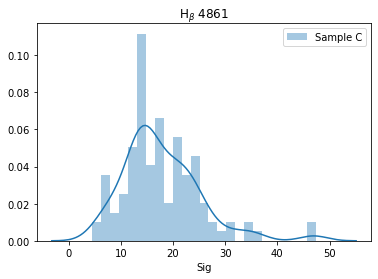

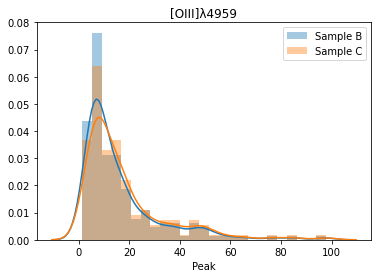

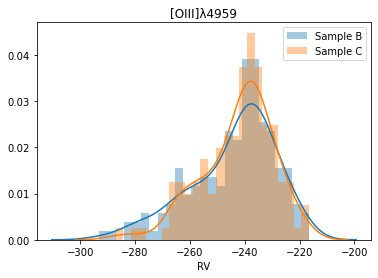

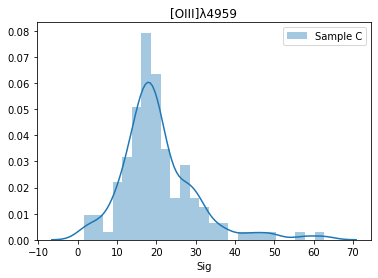

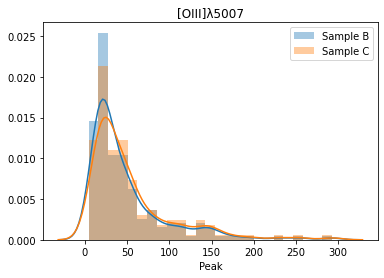

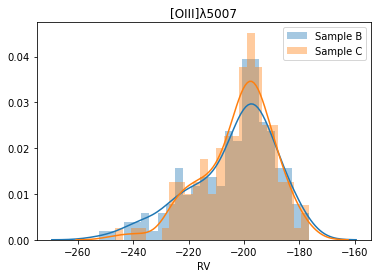

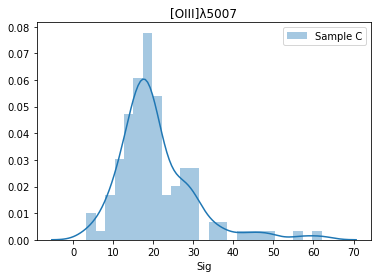

In [44]:
for i in range(n):

    fig, ax = plt.subplots()

    sns.distplot(argo[i][m0].Peak,bins=25,label='Sample B')
    sns.distplot(argo[i][m].Peak,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\F'+LineM[i]+'.png')

    fig, ax = plt.subplots()
    sns.distplot(argo[i][m0].RV,bins=25,label='Sample B')
    sns.distplot(argo[i][m].RV,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\RV'+LineM[i]+'.png')

    fig, ax = plt.subplots()
    #sns.distplot(argo[i][m0].Sig,bins=25,label='Sample B')
    sns.distplot(argo[i][m].Sig,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\S'+LineM[i]+'.png')


In [45]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 27.25211524963379 seconds ---
